In [25]:
import pandas as pd 

In [26]:
df = pd.read_csv(r"C:\Users\johnk\Downloads\r_merged_data.csv")

In [27]:
df.head(5)

,Unnamed: 0,status,list_date,list_price,year_built,sold_date,sold_price,baths_full,lot_sqft,sqft,baths,garage,stories,beds,type,city,county,lat,lon
0,0,sold,2023-06-29T21:16:25.000000Z,554950.0,1963.0,2023-09-18,NaN,2.0,10454.0,1821.0,2.0,1.0,NaN,3.0,single_family,Alaska,Juneau,58.36395,-134.59372
1,1,sold,NaN,NaN,NaN,2023-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska,Juneau,NaN,NaN
2,2,sold,NaN,NaN,NaN,2023-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska,Juneau,NaN,NaN
3,3,sold,NaN,NaN,NaN,2023-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska,Juneau,NaN,NaN
4,4,sold,NaN,NaN,NaN,2023-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska,Juneau,NaN,NaN


In [28]:
df.isnull().sum()

Unnamed: 0       0
status           0
list_date      407
list_price     438
year_built     843
sold_date        0
sold_price    1443
baths_full     848
lot_sqft      1168
sqft           836
baths          179
garage        3711
stories       1899
beds           655
type            34
city             0
county          10
lat            250
lon            250
dtype: int64

In [29]:
# Count the number of rows where 'list_price' and 'sold_price' are the same
same_price_count = df[df['list_price'] == df['sold_price']].shape[0]

# Display the result
same_price_count

1504

In [30]:
# Count the number of rows with 'list_price' not null and 'sold_price' null
count = df[(df['list_price'].notnull()) & (df['sold_price'].isnull())].shape[0]

# Display the result
count

1292

In [31]:
# drop the unnamed column its not neccecery
df = df.drop("Unnamed: 0", axis=1)

DataFrame shape: (8159, 18)

Number of missing values per row:
0     2652
1     3162
2     1067
3      342
4      185
5       69
6      248
7       52
8      113
9      116
10      38
11      44
12      37
13      20
14      14
Name: count, dtype: int64

Number of rows with 14 or more missing values: 14
Percentage of rows with 14 or more missing values: 0.17%

Missing values per column:
garage        3711
stories       1899
sold_price    1443
lot_sqft      1168
baths_full     848
year_built     843
sqft           836
beds           655
list_price     438
list_date      407
lon            250
lat            250
baths          179
type            34
county          10
city             0
sold_date        0
status           0
dtype: int64


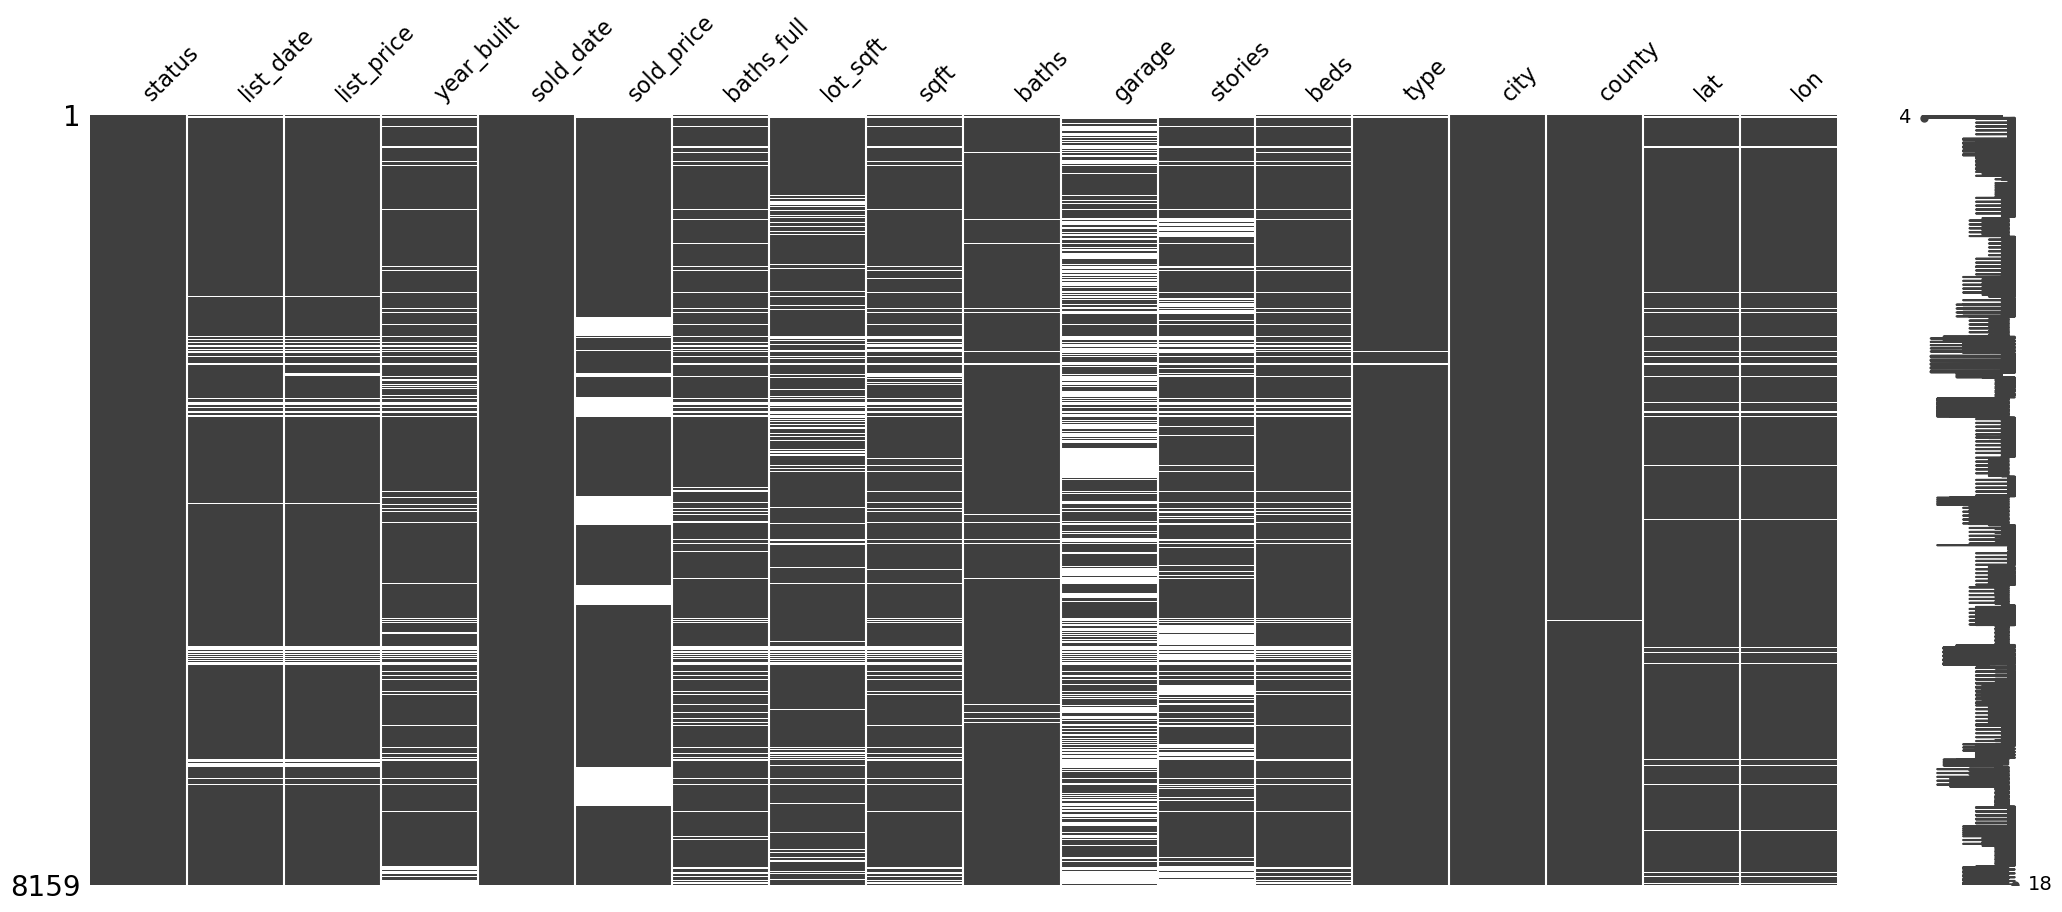

In [32]:

# Assuming your DataFrame is called 'df'
print(f"DataFrame shape: {df.shape}")

# Number of missing values per row
missing_per_row = df.isnull().sum(axis=1)
print("\nNumber of missing values per row:")
print(missing_per_row.value_counts().sort_index())

# Number of rows with 14 or more missing values
rows_with_many_missing = missing_per_row[missing_per_row >= 14]
print(f"\nNumber of rows with 14 or more missing values: {len(rows_with_many_missing)}")
print(f"Percentage of rows with 14 or more missing values: {len(rows_with_many_missing) / len(df) * 100:.2f}%")

# Missing values per column
missing_per_column = df.isnull().sum()
print("\nMissing values per column:")
print(missing_per_column.sort_values(ascending=False))

import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)  # Visualize the pattern of missing values
plt.show()

In [33]:
df["sold_price"].isnull().sum()


1443

In [34]:
# Fill 'sold_price' null values with 'list_price'
df['sold_price'].fillna(df['list_price'], inplace=True)

# Verify the changes
df.head()

df["sold_price"].isnull().sum()


C:\Users\johnk\AppData\Local\Temp\ipykernel_14324\3447562323.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sold_price'].fillna(df['list_price'], inplace=True)


151

In [35]:
# Fill NaN values in the 'garage' column with 0
df['garage'].fillna(0, inplace=True)

C:\Users\johnk\AppData\Local\Temp\ipykernel_14324\869320574.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['garage'].fillna(0, inplace=True)


In [36]:
# Drop rows with more than 10 NaN values
df = df.dropna(thresh=df.shape[1] - 10)

In [37]:
#Filling missing latitude based on the mean latitude for each city:

df['lat'] = df.groupby('city')['lat'].transform(lambda x: x.fillna(x.mean()))


In [38]:
#Filling missing longitude based on the mean longitude for each city:


df['lon'] = df.groupby('city')['lon'].transform(lambda x: x.fillna(x.mean()))


In [39]:
#Filling missing county based on the mode county for each city:

df['county'] = df.groupby('city')['county'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))

In [40]:
# Columns to fill missing values with their means
columns_to_fill = ['baths_full', 'lot_sqft', 'sqft', 'baths', 'stories', 'beds']

# Fill each column with its mean
for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mean())


In [41]:
# drop list_price because its almost the same as sold_price
df= df.drop("list_price", axis=1)

In [42]:
df.head()

,status,list_date,year_built,sold_date,sold_price,baths_full,lot_sqft,sqft,baths,garage,stories,beds,type,city,county,lat,lon
0,sold,2023-06-29T21:16:25.000000Z,1963.0,2023-09-18,554950.0,2.0,10454.000000,1821.0,2.0,1.0,1.567732,3.0,single_family,Alaska,Juneau,58.363950,-134.593720
5,sold,2023-08-21T21:01:22.000000Z,1969.0,2023-08-04,415000.0,1.0,251094.946789,950.0,1.0,0.0,1.567732,2.0,condos,Alaska,Juneau,58.386651,-134.649067
6,sold,2023-08-21T21:01:22.000000Z,1920.0,2023-08-03,835000.0,3.0,5875.000000,3860.0,3.0,2.0,1.567732,5.0,single_family,Alaska,Juneau,58.304573,-134.403991
7,sold,NaN,2002.0,2023-07-21,NaN,2.0,7476.000000,1375.0,2.0,0.0,1.000000,3.0,mobile,Alaska,Juneau,58.396178,-134.553717
12,sold,2023-08-21T21:01:22.000000Z,1969.0,2023-08-04,415000.0,1.0,251094.946789,950.0,1.0,0.0,1.567732,2.0,condos,Alaska,Juneau,58.386651,-134.649067


In [43]:
# filling the list_date column with the forward fill method to keep the sequence

df['list_date'] = df['list_date'].fillna(df['list_date'].mode()[0])



In [44]:
# filling the year_built with the median of the column 

df['year_built'] = df['year_built'].fillna(df['year_built'].median())


In [45]:
# Drop rows with null values in the 'sold_price' column
df = df.dropna(subset=['sold_price'])

# Verify the changes
df.shape

(7988, 17)

In [59]:
df.to_csv("cleaned_data.csv")